## Chapter 68: Plotting with pandas Series



In [38]:
import pandas as pd 
import matplotlib.pyplot as plt 
#plt.style.use('mdap.mplstyle') 
stocks = pd.read_csv('stocks10.csv', index_col='date', parse_dates=['date']) 
amzn = stocks['AMZN'] 
amzn.head(3)

date
1999-10-25    82.75
1999-10-26    81.25
1999-10-27    75.94
Name: AMZN, dtype: float64

In [7]:
# line plots

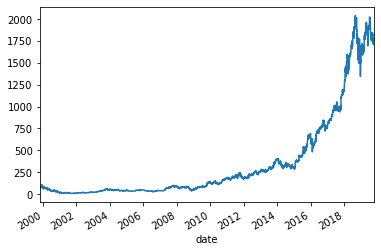

In [8]:
ax = amzn.plot(kind='line')

In [9]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [10]:
fig=ax.figure

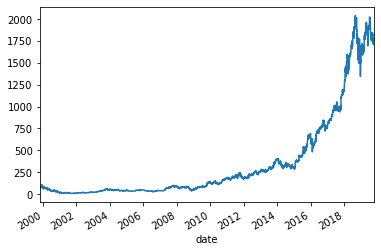

In [11]:
fig

In [12]:
fig.get_size_inches()


array([6., 4.])

In [13]:
fig.get_dpi()


72.0

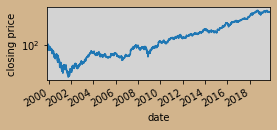

In [15]:
ax.set_ylabel('closing price') 
ax.set_facecolor('lightgray') 
ax.set_yscale('log') 
fig.set_facecolor('tan') 
fig.set_size_inches(4, 1.5) 
fig

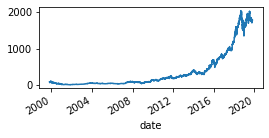

In [16]:
fig, ax = plt.subplots(figsize=(4, 1.5)) 
ax.plot(amzn) 
ax.set_xlabel('date') 
for label in ax.get_xticklabels(): 
    label.set_rotation(30) 
    label.set_ha('right')


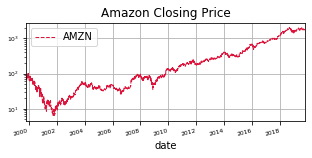

In [17]:
 amzn.plot(kind='line', figsize=(5, 2), logy=True, grid=True, legend=True, title='Amazon Closing Price', rot=15, fontsize=6, c='crimson', ls='--', lw=1);

In [37]:
# bar charts

In [18]:
amzn_up_down = amzn.pct_change(1) > .05 
amzn_up_down.head(3)


date
1999-10-25    False
1999-10-26    False
1999-10-27    False
Name: AMZN, dtype: bool

In [19]:
num_big_up_days = amzn_up_down.resample('Y', kind='period').sum() 
num_big_up_days.head(3)


date
1999     5.0
2000    42.0
2001    42.0
Freq: A-DEC, Name: AMZN, dtype: float64

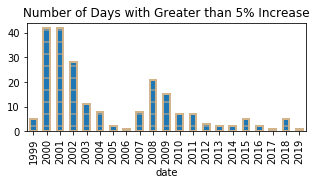

In [20]:
num_big_up_days.plot(kind='bar', figsize=(5, 2), title='Number of Days with Greater than 5% Increase', lw=2, ec='tan', hatch='-');

In [21]:
# distribution plots

In [23]:
emp = pd.read_csv('employee.csv', parse_dates=['hire_date']) 
sal = emp['salary'] 
sal.head(3)

0    87545.38
1    82182.00
2    49275.00
Name: salary, dtype: float64

In [24]:
# box and whisker plots

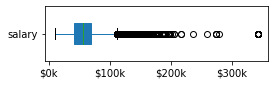

In [25]:
from matplotlib import ticker 
ax = sal.plot(kind='box', figsize=(4, 1), vert=False, widths=.4, patch_artist=True) 
conv_dollar = lambda x, pos: f'${x // 1000:.0f}k' 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(conv_dollar))


In [26]:
# Histograms

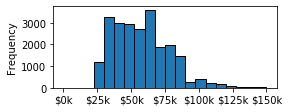

In [27]:
ax = sal.plot(figsize=(4, 1.5), kind='hist', bins=20, ec='black', range=(0, 150_000)) 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(conv_dollar))


In [28]:
# kdes

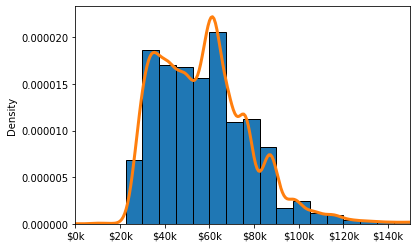

In [29]:
ax = sal.plot(kind='hist', bins=20, ec='black', range=(0, 150_000), density=True) 
sal.plot(kind='kde', xlim=(0, 150_000), lw=3) 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(conv_dollar))


In [30]:
# Pie Chart

In [31]:
sals = pd.cut(sal, bins=[0, 30_000, 70_000, 100_000, sal.max() + 1], labels=['< $30k', '$30k - $70k', '$70k - $100k', '> $100k']) 
sal_ct = sals.value_counts(sort=False) 
sal_ct

< $30k           1198
$30k - $70k     16559
$70k - $100k     4746
> $100k           859
Name: salary, dtype: int64

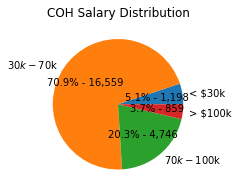

In [32]:
 ax = sal_ct.plot(kind='pie', figsize=(3, 3), title='COH Salary Distribution', autopct=lambda x: f'{x:.1f}% - {x / 100 * sal_ct.sum():,.0f}') 
ax.set_ylabel('');


In [33]:
# area plots

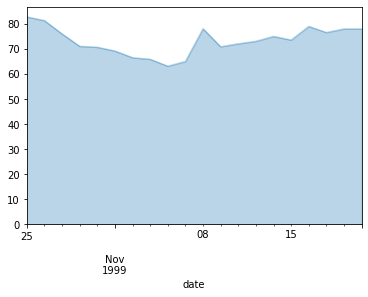

In [34]:
amzn.head(20).plot(kind='area', alpha=.3);

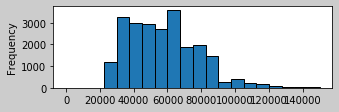

In [35]:
fig, ax = plt.subplots(figsize=(5, 1.5), facecolor='.8') 
sal.plot(kind='hist', bins=20, ec='black', range=(0, 150_000), ax=ax);

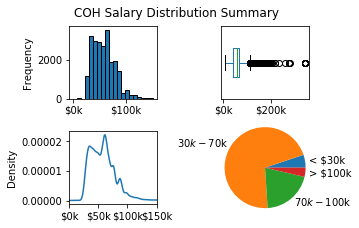

In [36]:
 fig, ax_array = plt.subplots(nrows=2, ncols=2, figsize=(5, 3), tight_layout=True) 
ax1, ax2, ax3, ax4 = ax_array.flatten() 
sal.plot(kind='hist', bins=20, ec='black', range=(0, 150_000), ax=ax1) 
sal.plot(kind='box', vert=False, widths=.4, ax=ax2, yticks=[]) 
sal.plot(kind='kde', xlim=(0, 150_000), ax=ax3) 
sal_ct.plot(kind='pie', ax=ax4, radius=1.4) 
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(conv_dollar)) 
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(conv_dollar)) 
ax3.xaxis.set_major_formatter(ticker.FuncFormatter(conv_dollar)) 
ax3.xaxis.set_major_locator(ticker.MultipleLocator(50_000)) 
ax4.set_ylabel('') 
fig.suptitle('COH Salary Distribution Summary', y=1.04);

In [1]:
# practice

In [2]:
import pandas as pd

In [3]:
emp = pd.read_csv('employee.csv', parse_dates=['hire_date']) 
sal = emp['salary'] 
sal.head(3)

0    87545.38
1    82182.00
2    49275.00
Name: salary, dtype: float64

In [4]:
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [9]:
gender_count=emp['sex'].value_counts()

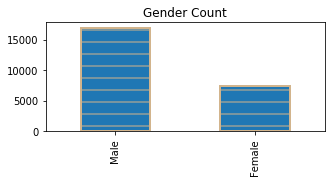

In [16]:
gender_count.plot(kind='bar', figsize=(5, 2), title='Gender Count', lw=2, ec='tan', hatch='-');

In [17]:
gender_count

Male      16950
Female     7358
Name: sex, dtype: int64

In [19]:
race_count=emp['race'].value_counts()

In [20]:
race_count

Black              8661
White              7779
Hispanic           6148
Asian              1547
Native American     146
Name: race, dtype: int64

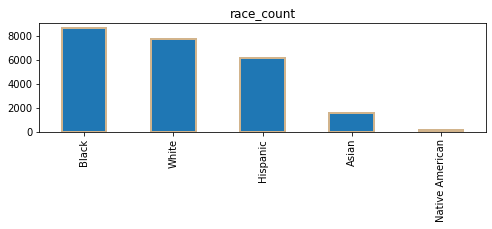

In [25]:
race_count.plot(kind='bar', figsize=(8, 2), title='race_count', lw=2, ec='tan')

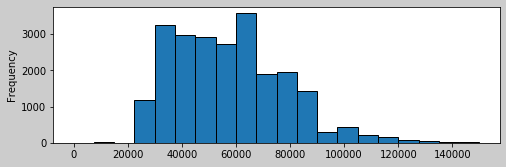

In [27]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(8, 2.5), facecolor='.8') 
sal.plot(kind='hist', bins=20, ec='black', range=(0, 150_000), ax=ax);

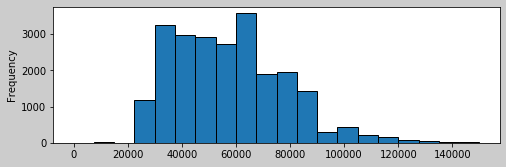

In [29]:
fig

In [30]:
#

In [39]:
x=50000
conv_dollar = lambda x: f'${x // 1000:.0f}k'

In [40]:
conv_dollar(53999)

'$53k'

In [42]:
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [43]:
emp['salk']=emp['salary'].apply(lambda x: f'${x // 1000:.0f}k')

In [45]:
emp.head()

,dept,title,hire_date,salary,sex,race,salk
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White,$87k
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic,$82k
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black,$49k
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic,$75k
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White,$69k


In [49]:
emp['salk'].dropna().value_counts()

$75k     1359
$63k      971
$nank     946
$61k      798
$68k      711
         ... 
$169k       1
$201k       1
$17k        1
$137k       1
$166k       1
Name: salk, Length: 172, dtype: int64

In [50]:
emp.query('salk=="$nank"')

,dept,title,hire_date,salary,sex,race,salk
125,Police,SENIOR POLICE OFFICER,1983-08-22,NaN,Male,White,$nank
161,Police,POLICE SERGEANT,1992-02-17,NaN,Male,White,$nank
181,Police,POLICE SERGEANT,1975-06-09,NaN,Male,Asian,$nank
234,Police,POLICE LIEUTENANT,1984-01-09,NaN,Male,White,$nank
243,Police,SENIOR POLICE OFFICER,1979-09-10,NaN,Male,White,$nank
...,...,...,...,...,...,...,...
24215,Police,SENIOR POLICE OFFICER,1985-09-03,NaN,Female,Black,$nank
24243,Police,SENIOR POLICE OFFICER,1981-11-02,NaN,Male,White,$nank
24257,Police,SENIOR POLICE OFFICER,1982-02-08,NaN,Male,White,$nank
24268,Police,SENIOR POLICE OFFICER,1984-01-09,NaN,Male,White,$nank


In [51]:
sals = pd.cut(sal, bins=[0, 30_000, 70_000, 100_000, sal.max() + 1], labels=['< $30k', '$30k - $70k', '$70k - $100k', '> $100k']) 


In [52]:
sals

0        $70k - $100k
1        $70k - $100k
2         $30k - $70k
3        $70k - $100k
4         $30k - $70k
             ...     
24303    $70k - $100k
24304    $70k - $100k
24305     $30k - $70k
24306     $30k - $70k
24307             NaN
Name: salary, Length: 24308, dtype: category
Categories (4, object): [< $30k < $30k - $70k < $70k - $100k < > $100k]

In [53]:
sal_ct = sals.value_counts(sort=False)

In [54]:
sal_ct

< $30k           1198
$30k - $70k     16559
$70k - $100k     4746
> $100k           859
Name: salary, dtype: int64

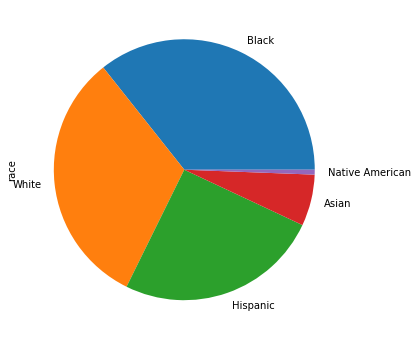

In [59]:
race_count.plot(kind='pie',figsize=(6,6));

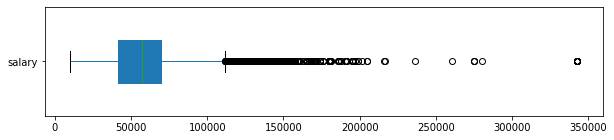

In [67]:
ax.set_xlim(0, 100_000) 
ax = sal.plot(kind='box', figsize=(10,2), vert=False, widths=.4, patch_artist=True)

In [69]:
sal.median()

56956.64

In [70]:
sal.min()

9912.0

In [71]:
sal.max()

342784.0

In [72]:
sal.quantile(0.5)

56956.64

In [73]:
sal.quantile(0.75)

69355.26

In [74]:
sal.quantile(0.25)

41122.0

In [75]:
emp.head()

,dept,title,hire_date,salary,sex,race,salk
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White,$87k
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic,$82k
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black,$49k
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic,$75k
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White,$69k


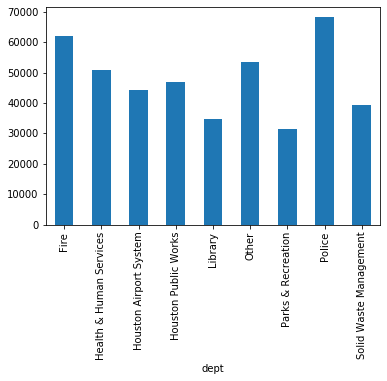

In [77]:
emp.groupby('dept')['salary'].median().plot(kind='bar')

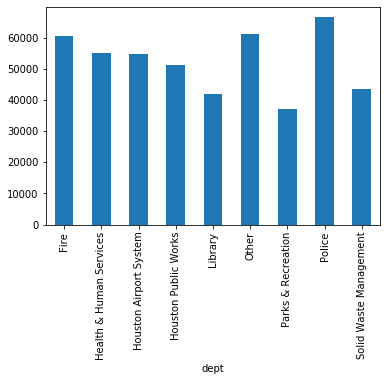

In [78]:
emp.groupby('dept')['salary'].mean().plot(kind='bar')

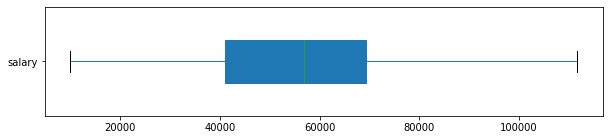

In [79]:
ax = sal.plot(kind='box', figsize=(10,2), vert=False, widths=.4, patch_artist=True,showfliers=False)

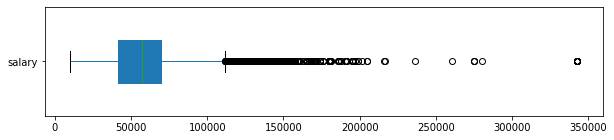

In [80]:
ax = sal.plot(kind='box', figsize=(10,2), vert=False, widths=.4, patch_artist=True)

## Chapter 69
# Plotting with pandas DataFrames


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
stocks = pd.read_csv('stocks10.csv', parse_dates=['date']) 
stocks.head(3)


,date,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
0,1999-10-25,29.84,2.32,17.02,82.75,NaN,21.45,38.99,16.78,NaN,NaN
1,1999-10-26,29.82,2.34,16.65,81.25,NaN,20.89,37.11,17.28,NaN,NaN
2,1999-10-27,29.33,2.38,16.52,75.94,NaN,20.80,36.94,18.27,NaN,NaN


In [3]:
# line plots

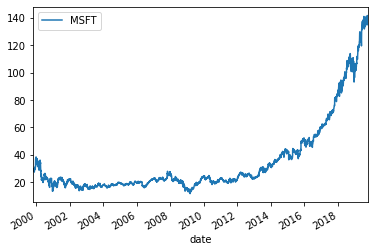

In [4]:
stocks.plot(x='date', y='MSFT', kind='line')

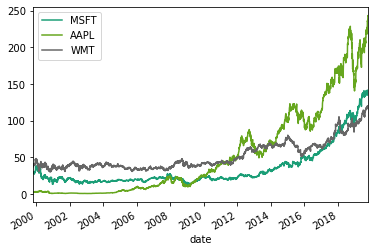

In [5]:
ax = stocks.plot(x='date', y=['MSFT', 'AAPL', 'WMT'], kind='line', cmap='Dark2')

In [6]:
oil_stocks = stocks.set_index('date')[['SLB', 'XOM']] 
oil_stocks.head(3)

,SLB,XOM
date,,
1999-10-25,17.02,21.45
1999-10-26,16.65,20.89
1999-10-27,16.52,20.80


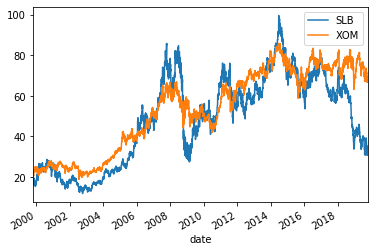

In [7]:
oil_stocks.plot(kind='line');

In [8]:
# Bar plots


In [11]:
life_exp = pd.read_csv('life_expectancy.csv') 
life_exp.head(3)

,year,country,sex,life_expectancy
0,2000,Afghanistan,all,55.9
1,2000,Afghanistan,female,57.3
2,2000,Afghanistan,male,54.6


In [12]:
low_le = life_exp.query('year == 2000 and sex == "all"').nsmallest(5, 'life_expectancy')
low_le


,year,country,sex,life_expectancy
435,2000,Sierra Leone,all,39.8
159,2000,Eritrea,all,43.9
543,2000,Zambia,all,44.4
93,2000,Central African Republic,all,45.4
408,2000,Rwanda,all,45.7


In [14]:
low_countries = low_le['country'] 
low_countries

435                Sierra Leone
159                     Eritrea
543                      Zambia
93     Central African Republic
408                      Rwanda
Name: country, dtype: object

In [15]:
low_le_4th = life_exp.query("country in @low_countries and year % 4 == 0 and sex =='all'") 



In [16]:
low_le_4th.head(10)

,year,country,sex,life_expectancy
93,2000,Central African Republic,all,45.4
159,2000,Eritrea,all,43.9
408,2000,Rwanda,all,45.7
435,2000,Sierra Leone,all,39.8
543,2000,Zambia,all,44.4
2289,2004,Central African Republic,all,45.5
2355,2004,Eritrea,all,58.7
2604,2004,Rwanda,all,51.9
2631,2004,Sierra Leone,all,43.4
2739,2004,Zambia,all,47.6


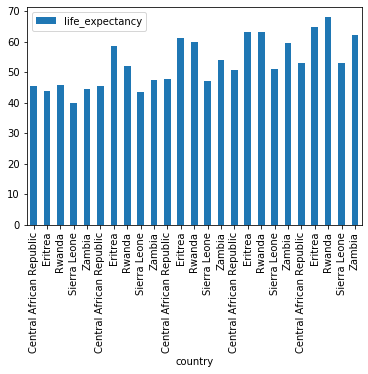

In [17]:
low_le_4th.plot(x='country', y='life_expectancy', kind='bar')

In [18]:
country_le = low_le_4th.pivot(index='year', columns='country',values='life_expectancy')
country_le

country,Central African Republic,Eritrea,Rwanda,Sierra Leone,Zambia
year,,,,,
2000,45.4,43.9,45.7,39.8,44.4
2004,45.5,58.7,51.9,43.4,47.6
2008,47.8,61.3,59.9,47.1,54.0
2012,50.7,63.3,63.1,51.1,59.6
2016,53.0,65.0,68.0,53.1,62.3


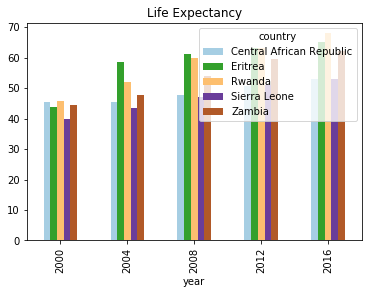

In [19]:
ax = country_le.plot(kind='bar', title='Life Expectancy', cmap='Paired')

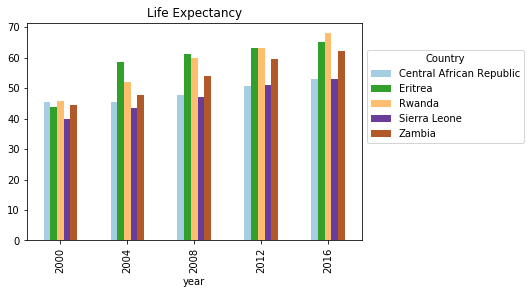

In [21]:
ax.legend(bbox_to_anchor=(1, .9), loc='upper left', title='Country') 
ax.figure

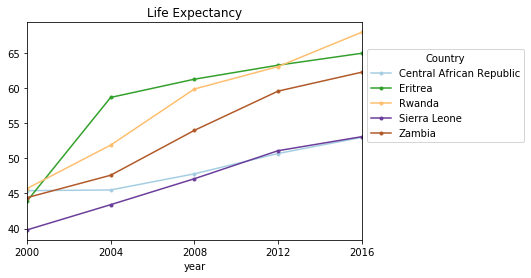

In [22]:
from matplotlib import ticker 
ax = country_le.plot(kind='line', title='Life Expectancy', cmap='Paired', marker='.') 
ax.legend(bbox_to_anchor=(1, .9), title='Country') 
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))


In [23]:
# Distribution plots

In [24]:
# box plots

In [27]:
cols = ['Neighborhood', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea' , 'LotArea', 'SalePrice']
housing = pd.read_csv('housing.csv', usecols=cols) 
housing.head(3)


,LotArea,Neighborhood,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice
0,8450,CollgCr,856,856,854,1710,548,208500
1,9600,Veenker,1262,1262,0,1262,460,181500
2,11250,CollgCr,920,920,866,1786,608,223500


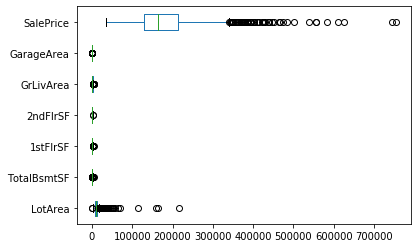

In [28]:
 housing.plot(kind='box', vert=False);

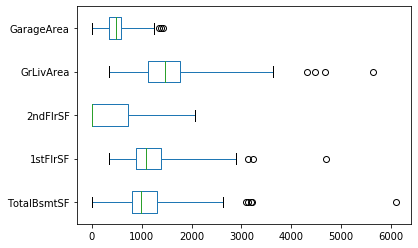

In [29]:
 housing.plot(y=cols[1:-2], kind='box', vert=False, whis=3);


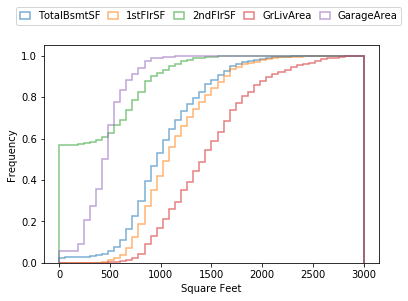

In [30]:
ax = housing.plot(y=cols[1:-2], kind='hist', bins=50, range=(0, 3_000), alpha=.6, histtype='step', cumulative=True, lw=1.5, density=True) 
ax.set_xlabel('Square Feet') 
ax.legend(bbox_to_anchor=(-.1, 1.2), loc='upper left', ncol=5, handlelength=1, columnspacing=.8);

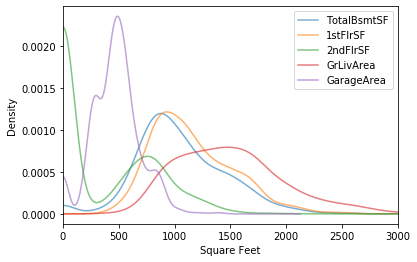

In [32]:
ax = housing.plot(y=cols[1:-2], kind='kde', alpha=.6, lw=1.5, xlim=(0, 3_000),legend=True) 
ax.set_xlabel('Square Feet');


In [33]:
# scatter plot

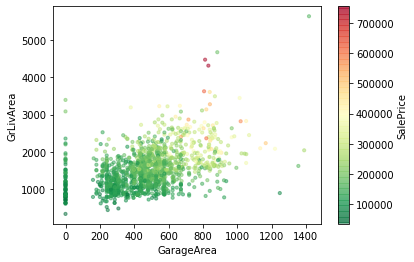

In [34]:
ax = housing.plot(x='GarageArea', y='GrLivArea', kind='scatter', s=10, c='SalePrice', cmap='RdYlGn_r', alpha=.5) 
ax.xaxis.label.set_visible(True) 
ax.tick_params(axis='x', labelbottom=True)


In [35]:
# hexbin plot

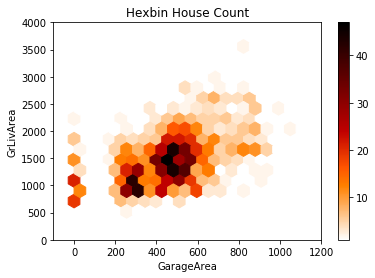

In [36]:
 ax = housing.plot(x='GarageArea', y='GrLivArea', kind='hexbin', xlim=(-100, 1_200), ylim=(0, 4_000), title='Hexbin House Count', cmap='gist_heat_r', gridsize=25, mincnt=1) 
ax.xaxis.label.set_visible(True) 
ax.tick_params(axis='x', labelbottom=True)
